# Creating a Graph

By default networkx creates undirected graph.

In [1]:
print("hello")

hello


In [2]:
import networkx as nx
G = nx.Graph()

## Adding Nodes and Edges

In NetworkX, nodes can be any hashable object eg: text string, image, XML object, another Graph, a customized node object, etc.

NOTE: Python's None object shouldn't be used as a node – it determines whether optional function args have been assigned in many functions.

In [3]:
#addidng nodes one by one
G.add_node(1)


#adding nodes from an iterable
G.add_nodes_from([2,3])


#adding edges one at a time
G.add_edge(1,2)

#adding edges from an iterable
G.add_edges_from([(1,2) , (1,3)])

#Adding edges with a weight
G.add_edge(1, 2, weight=0.5)


## Determing \#Nodes and \#Edges

In [4]:
G.number_of_nodes(), G.number_of_nodes()

(3, 3)

# Exploring graph attributes

We will now look into how to retrived nodes, edges and adjency list view of graph

In [5]:
#Retrieveing nodes in a grpah
print(list(G.nodes))

#Retrieveing edges in a grpah
print(list(G.edges))

#Retrieveing adjency list of a grpah
print(G.adj)

[1, 2, 3]
[(1, 2), (1, 3)]
{1: {2: {'weight': 0.5}, 3: {}}, 2: {1: {'weight': 0.5}}, 3: {1: {}}}


# Types of Graph supported
1. Undirected
2. Directed Graph
3. MultiGraph: supports multiple edges b/w nodes in the graph

In [6]:
#directed graph
H = nx.DiGraph(G)

#multi-grpah
M = nx.MultiGraph(G)

print(list([H.edges()]))
print(list([M.edges()]))


[OutEdgeView([(1, 2), (1, 3), (2, 1), (3, 1)])]
[MultiEdgeDataView([(1, 2), (1, 3)])]


## Properties of nodes

1. Neighbors
2. Degree

In [7]:
# Print neighbors of G
print(list(G.neighbors(1)))

#print degree of a node
print(G.degree(1))

[2, 3]
2


In [8]:
#in directed graph you have in-degree and out-degree
H.in_degree(2), H.out_degree(2)

#in case of directed graphs you can also access immediate successors and predecessors
list(H.successors(1)), list(H.predecessors(1))

([2, 3], [2, 3])

# Graph problems

1. Determing MST
2. All pair shortest path
3. Determining diameter of graph
4. Avg Shortest Path length
5. Identifying bridges and articulation point
6. Connected components

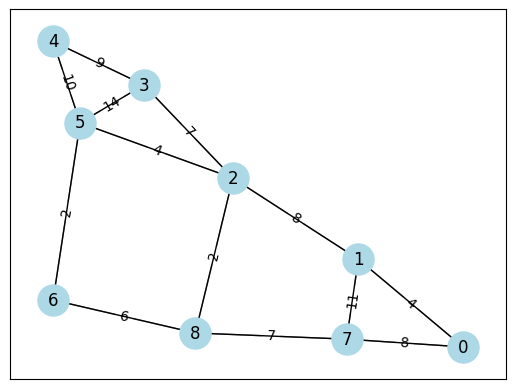

In [9]:
# Start with a graph

G = nx.Graph()
G.add_edges_from(
    [
        (0, 1, {"weight": 4}),
        (0, 7, {"weight": 8}),
        (1, 7, {"weight": 11}),
        (1, 2, {"weight": 8}),
        (2, 8, {"weight": 2}),
        (2, 5, {"weight": 4}),
        (2, 3, {"weight": 7}),
        (3, 4, {"weight": 9}),
        (3, 5, {"weight": 14}),
        (4, 5, {"weight": 10}),
        (5, 6, {"weight": 2}),
        (6, 8, {"weight": 6}),
        (7, 8, {"weight": 7}),
    ]
)

pos = nx.spring_layout(G,seed=42)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
)
nx.draw_networkx_edges(G, pos)

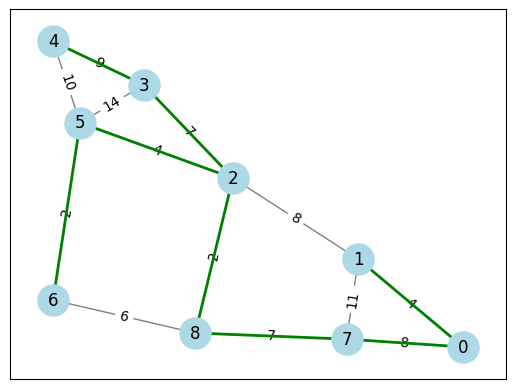

In [10]:
# Fiding MST
T = nx.minimum_spanning_tree(G)

# Visualize the graph and the minimum spanning tree
pos = nx.spring_layout(G,seed=42)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
) 
nx.draw_networkx_edges(T, pos, edge_color="green", width=2)

In [11]:
# Fiding shortest path from a source
T = nx.single_source_dijkstra(G, 0)
T

({0: 0, 1: 4, 7: 8, 2: 12, 8: 14, 5: 16, 6: 18, 3: 19, 4: 26},
 {0: [0],
  1: [0, 1],
  7: [0, 7],
  2: [0, 1, 2],
  8: [0, 1, 2, 8],
  5: [0, 1, 2, 5],
  3: [0, 1, 2, 3],
  6: [0, 1, 2, 5, 6],
  4: [0, 1, 2, 5, 4]})

In [12]:
#all pair shortest path
all_path = dict(nx.all_pairs_dijkstra(G))
all_path

#diameter of graph
diameter = 0
len_path = dict(nx.all_pairs_shortest_path_length(G))

for key,val in len_path.items():
    curr_max = max(val.values())
    if diameter < curr_max:
        diameter = curr_max

diameter, nx.diameter(G)

#determining average length of path


(4, 4)

False
[]


[]

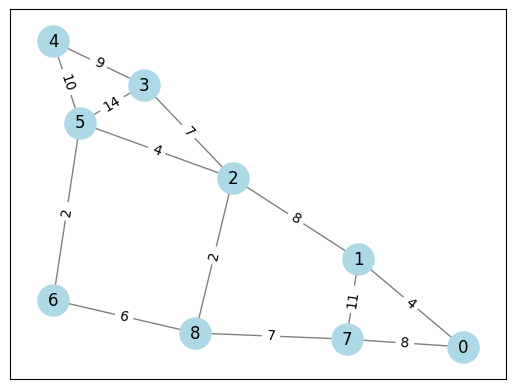

In [13]:
# G.remove_edge(1, 2)

pos = nx.spring_layout(G,seed=42)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
)

#has bridges
print(nx.has_bridges(G))
print(list(nx.bridges(G)))



#identify articulation points
list(nx.articulation_points(G))

In [14]:
#connected compenents
print(list(nx.connected_components(G)))

# G.remove_edge(1, 2)
# G.remove_edge(7,8)

list(nx.connected_components(G))

[{0, 1, 2, 3, 4, 5, 6, 7, 8}]


[{0, 1, 2, 3, 4, 5, 6, 7, 8}]

# Centrality Measures.
Centrality measures are algorithms that use graph theory to calculate the importance of nodes in a network. They assign a value to each node or edge in a graph, with higher values indicating greater importance. We will cover four types of centrality measures:
1. Degree Centrality
2. Eigenvector Centrality
3. Closeness Centrality
4. Betweeness Centrality
5. PageRank

## Degree Centrality

Degree centrality defines the importance of a node based on the degree of that node. The higher the degree, the more crucial it becomes in the graph. It’s used to find popular individuals, the most connected individuals, individuals who connect quickly in a wider network, or the ones that hold the most information.

In [15]:
nx.degree_centrality(G)

{0: 0.25,
 1: 0.375,
 7: 0.375,
 2: 0.5,
 8: 0.375,
 5: 0.5,
 3: 0.375,
 4: 0.25,
 6: 0.25}

## Eigenvector centrality
Eigenvector centrality defines a node's importance based on the function of its neighboring nodes. For instance, consider a node in a network. Check all the nodes it’s connected to. If a node is linked to or surrounded by highly important nodes in a network, it ought to have a high eigenvector centrality score. It’s what makes it an important part of the whole network.

Relationships with high scoring nodes have more contribution to the score of a node than connections to nodes with low eigenvector centrality scores.

This centrality identifies nodes that influence the whole network, not only those that are linked. A high score of a node will automatically mean that its neighboring connected nodes have high scores too. It has a wide range of applications, one of which is the calculation of PageRank used by Google. It also finds use in understanding human social networks, malware propagation, etc.

In [16]:
nx.eigenvector_centrality(G, weight='weight')

{0: 0.0655602327872582,
 1: 0.16673764029017973,
 7: 0.11761993021676574,
 2: 0.31666512242990535,
 8: 0.07515987622665644,
 5: 0.5648434524025042,
 3: 0.5747044556553168,
 4: 0.44119530002666413,
 6: 0.06444789063670708}

## Closeness centrality
Closeness centrality identifies a node's importance based on how close it is to all the other nodes in the graph. The closeness is also known as geodesic distance (GD), which is the number of links included in the shortest path between two nodes.

To calculate that closeness or GD for a node, sum up all the GD amidst that and all the other nodes in the network on the graph.

Closeness centrality finds application in identifying individuals that are in a position to influence the entire network in the fastest way possible. It’s also used to identify influences outside a highly connected network. Individuals with a high score of this centrality can acquire and control crucial information within the organization. A third application is to predict the importance of words in a particular document on the basis of a graph-based keyphrase extraction process.

In [17]:
nx.closeness_centrality(G , distance='weight')

{0: 0.06837606837606838,
 1: 0.08333333333333333,
 7: 0.08,
 2: 0.12903225806451613,
 8: 0.11428571428571428,
 5: 0.10810810810810811,
 3: 0.08080808080808081,
 4: 0.06060606060606061,
 6: 0.09523809523809523}

## Betweenness Centrality
Betweenness Centrality defines the importance of any node based on the number of times it occurs in the shortest paths between other nodes. It measures the percent of the shortest path in a network and where a particular node lies in it.

A node with high betweenness centrality is considered the most influential one over other nodes in the network. This is because this measure can provide insights into the most critical path as disrupting them will disrupt the network.

Betweenness centrality is used to analyze global terrorism networks. Anti-terrorism agencies utilize the information from these measures to detect and eliminate possible threats. It’s also used to measure the network flow in telecommunication networks or e-commerce package delivery processes. In addition, microbloggers use this centrality to enhance their reach on Twitter with the assistance of a recommendation engine. It shows who they should connect with to form a bigger communication network.

In [18]:
nx.betweenness_centrality(G, weight='weight')

{0: 0.0,
 1: 0.21428571428571427,
 7: 0.0,
 2: 0.6428571428571428,
 8: 0.17857142857142855,
 5: 0.3571428571428571,
 3: 0.0,
 4: 0.0,
 6: 0.0}

## PageRank
A subvariant in the eigenvector centrality is PageRank. It’s defined as the measure of directional influence of nodes and, thus, is most suited for directed graphs.

Since eigenvector centrality is suitable for undirected graphs, there wasn’t one for directed graphs before PageRank entered the picture. It has applications in online platforms like Twitter, which uses this centrality to offer recommendations of other accounts that a user can follow.

PageRank is also used to detect flaws in the fraud detection system utilized in the insurance and healthcare industries. The algorithm even predicts traffic workflows in public spaces and streets by running over a graph that includes road intersections.

In [19]:
nx.pagerank(G , weight='weight')

{0: 0.07428179165212181,
 1: 0.12687056269761718,
 7: 0.14858093638784936,
 2: 0.1103245818428357,
 8: 0.09641729160961221,
 5: 0.14651952735139476,
 3: 0.144282499769584,
 4: 0.09497171659647571,
 6: 0.057751092092509206}

# Community Detection
A community in a graph is a group of nodes that are more densely connected to each other than they are to the rest of the network. Netowrkx supports various kinds of community detection algorithms listed [here](https://networkx.org/documentation/stable/reference/algorithms/community.html).

We focus on two popular algorithms:
1. [greedy_modularity_communities](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities)
2. [girvan_newman](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman)
3. [louvain_communities](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities)

0.37257797731569003

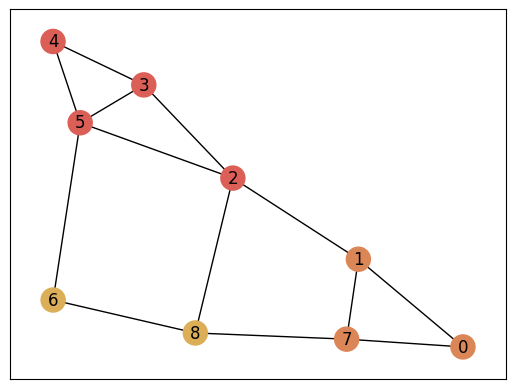

In [20]:
#Community visualization
import seaborn as sns
colors = sns.color_palette("hls",20).as_hex()

pos = nx.spring_layout(G,seed=42)
lst_b = nx.community.greedy_modularity_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in lst_b:
  for n in x:
    color_map_b[n] = colors[counter]
  counter = counter + 1

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
nx.community.modularity(G,lst_b, weight='weight')

{0: Text(1.0, -0.6658025104144629, '0'),
 1: Text(0.5798701532323854, -0.1951910322484153, '1'),
 7: Text(0.5326297371607452, -0.6240495901266822, '7'),
 2: Text(0.07575552139516183, 0.24015165092783503, '2'),
 8: Text(-0.07515052435332331, -0.5909720988130599, '8'),
 5: Text(-0.5377265993711928, 0.5368580491244663, '5'),
 3: Text(-0.28215996978449953, 0.7400233266314676, '3'),
 4: Text(-0.6467588086746319, 0.9730493746716024, '4'),
 6: Text(-0.6464595096046445, -0.4140671697527529, '6')}

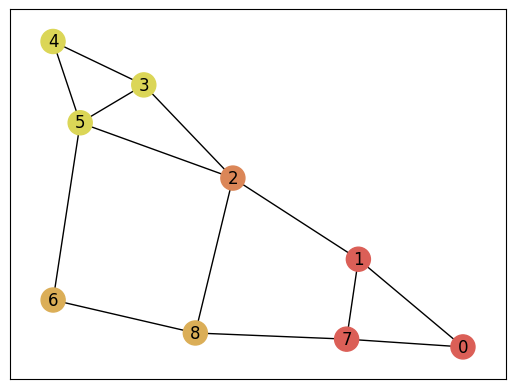

In [21]:
pos = nx.spring_layout(G,seed=42)
lst_b = nx.community.girvan_newman(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for i, x in enumerate(lst_b):
  if i == 2:
    for c in x:
      for n in c:
        #print(n,counter)
        color_map_b[n] = colors[counter]
      counter = counter + 1
    break
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)

0.37257797731569003

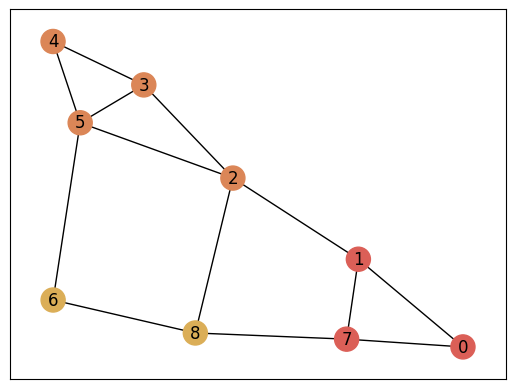

In [22]:
pos = nx.spring_layout(G,seed=42)
lst_b = nx.community.louvain_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in lst_b:
    for n in x:
      #print(n,counter)
      color_map_b[n] = colors[counter]
    counter = counter + 1

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
nx.community.modularity(G,lst_b, weight='weight')